<a href="https://colab.research.google.com/github/Duduz1nh00/TC/blob/main/TC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

Nessa an√°lise foram utilizadas algumas das principais bibliotecas:

*pandas*: Para manipula√ß√£o e an√°lise eficiente de dados. <br/>
*numpy*: Para opera√ß√µes matem√°ticas e manipula√ß√£o de arrays num√©ricos.<br/>
*seaborn* e *matplotlib*: Para visualiza√ß√£o e cria√ß√£o de gr√°ficos estat√≠sticos.<br/>
*scikit-learn*: Para pr√©-processamento, constru√ß√£o, treinamento e avalia√ß√£o de modelos de aprendizado de m√°quina.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures

**Carregando DataSet**

In [ ]:
df = pd.read_csv("insurance.csv")

# Explora√ß√£o de dados

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
df.isnull().sum()

**Normaliza√ß√£o dos dados**

Neste script, realizamos a normaliza√ß√£o e prepara√ß√£o dos dados para an√°lise. A normaliza√ß√£o √© uma etapa essencial ao trabalhar com dados categ√≥ricos e num√©ricos, pois facilita a an√°lise e a modelagem dos dados.




In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

**Matriz de correla√ß√£o**

Ap√≥s a normaliza√ß√£o dos dados, √© poss√≠vel visualizar as rela√ß√µes entre as diferentes vari√°veis utilizando uma matriz de correla√ß√£o. A matriz de correla√ß√£o √© uma ferramenta estat√≠stica que mede a for√ßa e a dire√ß√£o da rela√ß√£o linear entre vari√°veis num√©ricas.


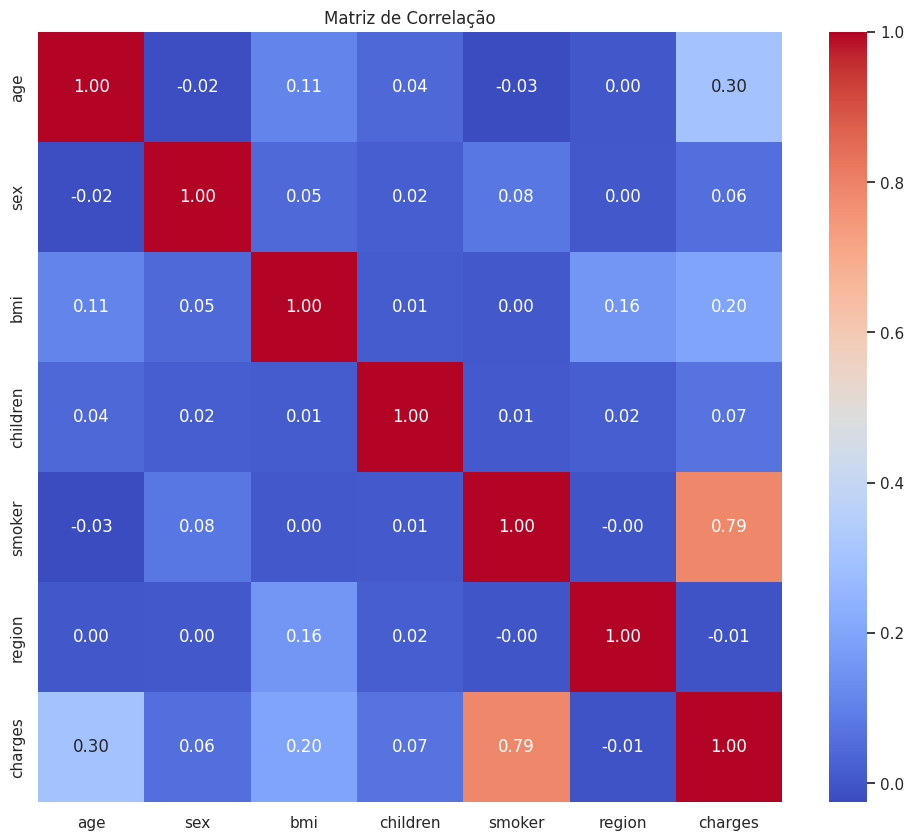

In [ ]:
# Remover espa√ßos em branco extras nas colunas
df.columns = df.columns.str.strip()

# Calcular a correla√ß√£o entre vari√°veis num√©ricas
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correla√ß√£o')
plt.show()

**Grafico Fumantes x n√£o fumantes por sexo**

Criado grafico para melhor visualiza√ß√£o grafica de fumantes para n√£o fumantes de acordo com os dados de coorela√ß√£o obtidos na Matrix.



Text(0.5, 1.0, 'O numero de fumantes e n√£o fumantes separados por sexo (Maior de 18 anos)')

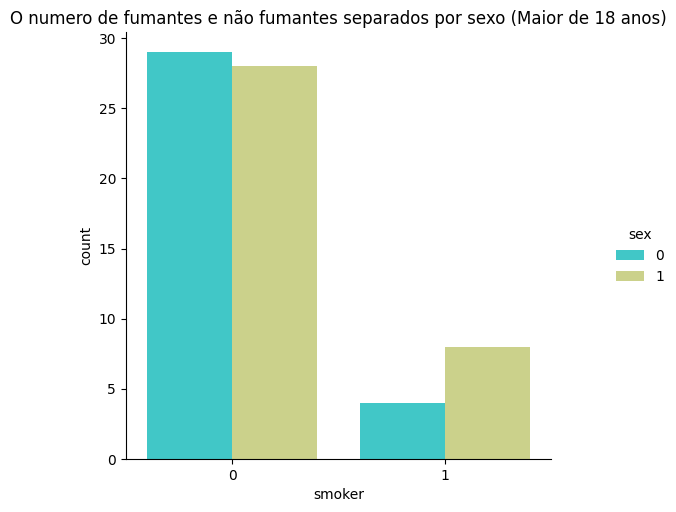

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("O numero de fumantes e n√£o fumantes separados por sexo (Maior de 18 anos)")

**Treinando e Avaliando Modelos de Regress√£o**

Neste bloco de c√≥digo, vamos come√ßar separando as features (x) e o target (y), e depois dividimos os dados em treino e teste. A seguir, vamos treinar v√°rios modelos de regress√£o, como Regress√£o Linear, Floresta Aleat√≥ria, √Årvore de Decis√£o, Gradient Boosting, KNN, e SVR.

Para cada modelo, vamos avaliar o desempenho usando o
ùëÖ¬≤, MSE (Erro Quadr√°tico M√©dio), e MAE (Erro Absoluto M√©dio), tanto no treino quanto no teste. Isso vai ajudar a identificar qual modelo funciona melhor para prever a vari√°vel charges.

In [ ]:
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('LR: ' , lr.score(x_test,y_test))

# df['region']= label_encoder.fit_transform(df['region'])
X = df.drop(['charges','region'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)
X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)
Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)
print('Poly: ', plr.score(X_test,Y_test))

LR:  0.7833463107364539
Poly:  0.8849197344147233


# Valores reais x previsto

Este c√≥digo realiza uma an√°lise de regress√£o polinomial para prever a vari√°vel charges. Ele come√ßa preparando os dados ao remover a coluna charges e a coluna region do DataFrame e criando caracter√≠sticas polinomiais de segundo grau. Em seguida, divide os dados em conjuntos de treino e teste e treina um modelo de regress√£o linear usando essas caracter√≠sticas polinomiais

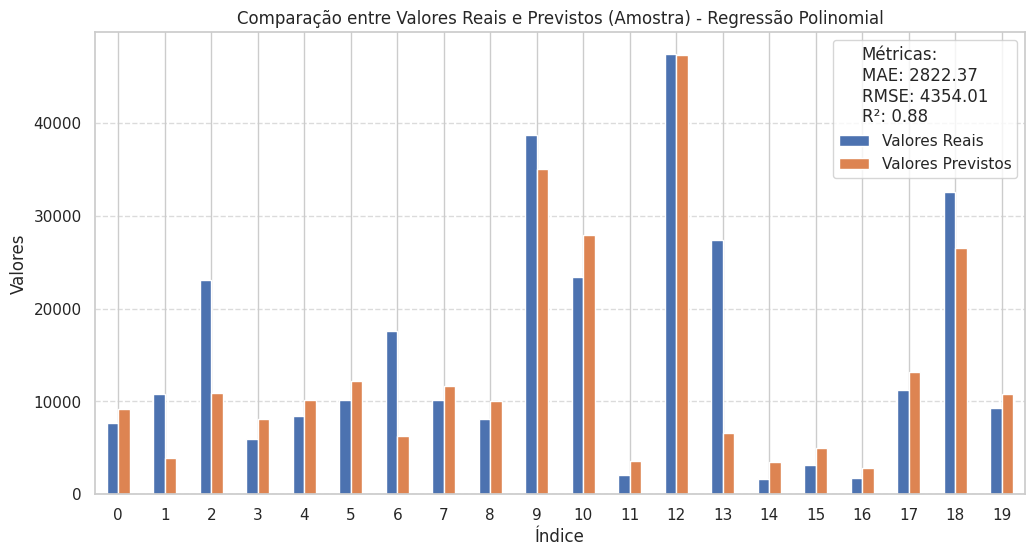

In [134]:
# Prepara√ß√£o dos dados para regress√£o polinomial
X = df.drop(['charges', 'region'], axis=1)
y = df['charges']

# Cria√ß√£o de caracter√≠sticas polinomiais
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)

# Divis√£o dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state=0)

# Treinamento do modelo de regress√£o polinomial
plr = LinearRegression().fit(X_train, y_train)

# Fazer previs√µes
y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

# C√°lculo de m√©tricas
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Criar um DataFrame para compara√ß√£o
df_comparacao = pd.DataFrame({'Valores Reais': y_test, 'Valores Previstos': y_test_pred})

# Selecionar um subconjunto para o gr√°fico de barras
df_sample = df_comparacao.sample(n=20, random_state=42).reset_index(drop=True)

# Gr√°fico de barras
plt.figure(figsize=(12, 6))
df_sample.plot(kind='bar', ax=plt.gca())
plt.xlabel('√çndice')
plt.ylabel('Valores')
plt.title('Compara√ß√£o entre Valores Reais e Previstos (Amostra) - Regress√£o Polinomial')
plt.xticks(rotation=0)
plt.legend(['Valores Reais', 'Valores Previstos'], title=f'M√©tricas:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR¬≤: {r2:.2f}')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()